In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json


#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


# AD and KS test

In [2]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("") 

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



## KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

## AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

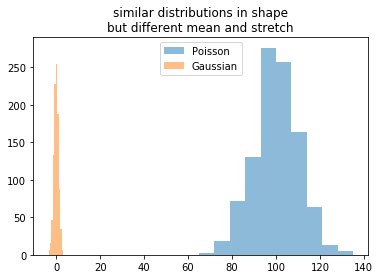

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


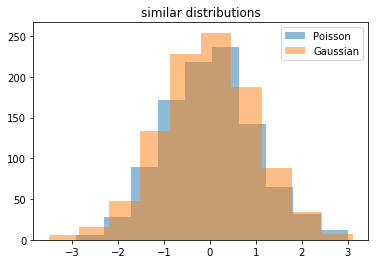

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


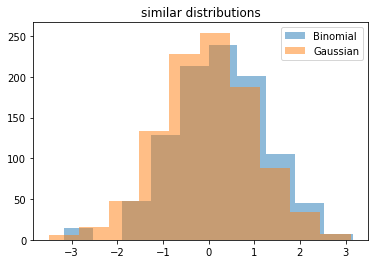

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456722, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [3]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")


## Null for each results

### KS: Observed (binomial/poisson) distribution is idential to the gaussian distribution it is tested against

### AD: The sampled (binomial/poisson) distribution is drawn from a population that follows a gaussian distribution

## The results for the Binomial vs. Gaussian Test

### KS: You reject the null hypothesis because the pvalue is 0 less then alpha which is 0.05

### AD: We reject the null hypothesis because our statistic AD = 15.85 is way larger then the threshold (for alpha = 0.05)...the threshold for alpha 0.05 is 0.784.

# KL Divergence

## KL: 

In [4]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest


In [5]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


## Results of KL Test:

### normal on normal:

### poisson on normal:

### binomial on normal:

# BINOMIAL

In [34]:
narray = np.random.randint(10,500,100)
narray.sort()

print(narray)

[ 10  16  22  22  26  34  36  44  48  49  49  56  62  62  63  67  68  69
  73  89  89  91  92  92  98  99 100 103 107 111 124 149 149 170 179 186
 189 199 201 207 209 211 214 214 214 215 222 225 238 250 257 265 270 271
 294 296 298 299 303 311 313 319 329 330 330 334 338 341 343 347 349 357
 358 360 360 366 388 392 396 398 402 407 407 408 415 420 422 435 439 440
 441 446 455 460 460 466 469 474 479 485]


In [35]:
np.random.seed(999)


#loop over the different values of n (or n and p)
ks_s_b = np.zeros(100)
ks_p_b = np.zeros(100)
ad_b = np.zeros(100)
kl_b = np.zeros(100)

for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)a
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)


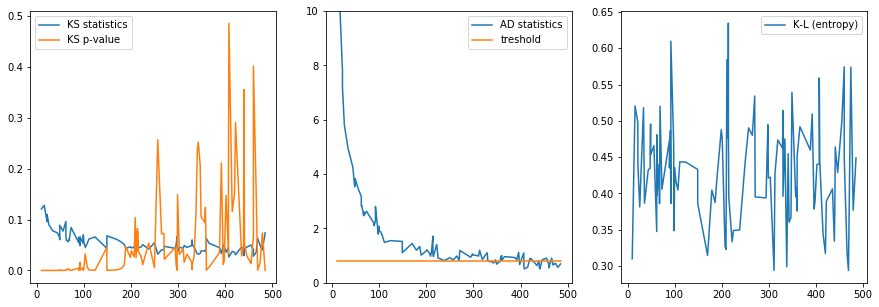

In [36]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();

# Captions:

## Plot 1:  

## Plot 2:

## Plot 3:

# Poisson


In [37]:
np.random.seed(999)


#loop over the different values of n (or n and p)
ks_s_b = np.zeros(100)
ks_p_b = np.zeros(100)
ad_b = np.zeros(100)
kl_b = np.zeros(100)

for i,L in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.poisson(L, 1000) -100) *0.1
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)a
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)


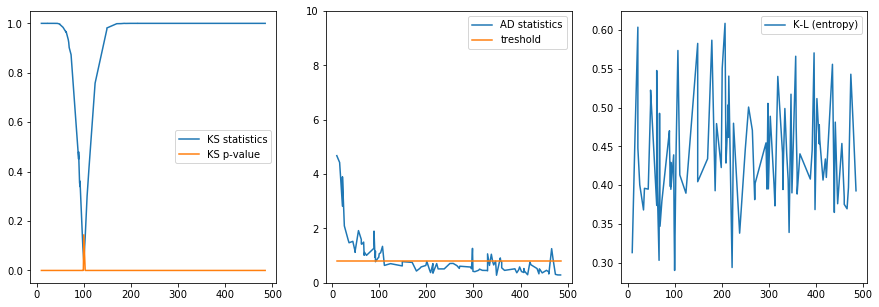

In [38]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();